# Intro
Simple Program to load and check the 4STAR archive files.

For R0 of ORACLES 2017, aod and Gases

# Load the defaults and imports

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [2]:
from linfit import linfit

In [3]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
fp ='C:/Users/sleblan2/Research/ORACLES/'

# load the files

In [15]:
days = ['20170809']

In [6]:
vv = 'R0'

In [7]:
vi = ''

In [16]:
outaod_RA = []
outaod_head_RA = []
outgas_RA = []
outgas_head_RA = []
for i,d in enumerate(days):
    try:
        print 'Doing day: {}'.format(d)
        fname_aod = fp+'aod_ict_2017/4STAR-AOD_P3_{}_{vv}.ict'.format(d,vv=vv,vi=vi)
        tt,th = load_ict(fname_aod,return_header=True)
    except:
        print '*** Problem with day: {} *** Skipping '.format(d)
        days.pop(i)
        continue
    
    outaod_RA.append(tt)
    outaod_head_RA.append(th)
    
    #fname_gas = fp+'gas_ict/korusaq-4STAR-GASES_DC8_{}_RA.ict'.format(d)
    #ttr,thr = load_ict(fname_gas,return_header=True)
    #outgas_RA.append(ttr)
    #outgas_head_RA.append(thr)

Doing day: 20170809
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650')


In [17]:
len(outaod_RA)

1

In [18]:
len(days)

1

## Check the files for integrity and header info

In [123]:
for i,s in enumerate(outaod_head_RA[0]):
    for ig,g in enumerate(outaod_head_RA):
        if not s==g[i]:
            print 'no match on {vv} aod string line {}: {} and {vv} of num {}:{} '.format(i,s,ig,g[i],vv=vv)
#    for ir,r in enumerate(outgas_head_RA):
#        if not s==r[i]:
#            print 'no match on RA gas string line {}: {} and RA of num {}:{} '.format(i,s,ir,r[i])

no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 1:2016, 08, 25, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 2:2016, 08, 27, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 3:2016, 08, 30, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 4:2016, 09, 04, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 5:2016, 09, 06, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 6:2016, 09, 08, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 7:2016, 09, 10, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 8:2016, 09, 12, 2017, 05, 01
 
no match on R1 aod string line 6: 2016, 08, 24, 2017, 05, 01
 and R1 of num 9:2016, 09, 14, 2017, 05, 01
 
no match on R1 aod string line 6: 201

In [11]:
print 'day:       AOD {vv}     GAS {vv}'.format(vv=vv)
for i,d in enumerate(days):
    try:
        print '{}: {}  {}'.format(d,len(outaod_RA[i]['Start_UTC']),len(outgas_RA[i]['Start_UTC']))
    except:
        print '{}: missed'.format(d)

day:       AOD R2     GAS R2
20160908: missed


In [20]:
outaod_head_RA[0]

['87, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2017\n',
 '1, 1\n',
 '2017, 08, 09, 2017, 08, 11\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20170809\n',
 '53\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 ' -9999.0000000, -9999.0000000, -9999.0, -9999, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -

In [41]:
outgas_head_RA[0]

IndexError: list index out of range

## Check the variables in header

In [21]:
nm = outaod_RA[0].dtype.names

In [22]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD0355',
 'AOD0380',
 'AOD0452',
 'AOD0470',
 'AOD0501',
 'AOD0520',
 'AOD0530',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0660',
 'AOD0675',
 'AOD0700',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1250',
 'AOD1559',
 'AOD1627',
 'AOD1650',
 'UNCAOD0355',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0470',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0530',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0660',
 'UNCAOD0675',
 'UNCAOD0700',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650')

In [23]:
wl = nm[6:-1]

In [24]:
wl = wl[0:24]

<IPython.core.display.Javascript object>


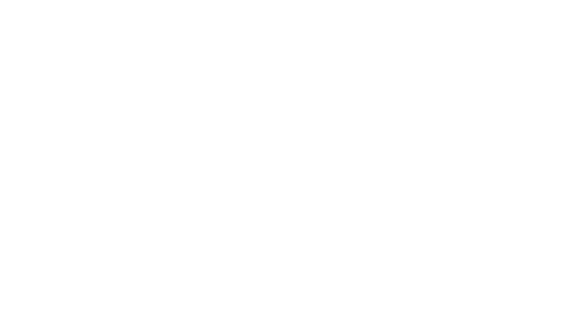

NameError: name 'out_R2' is not defined

In [14]:
plt.figure()
plt.plot(out_R2[0][nm[0]],out_R2[0][nm[9]],'.')
for x in out_R2[0][nm[0]][np.where(out_R2[0][nm[4]]==1)[0]]:
    plt.axvline(x,color='#DDDDDD',alpha=0.02)

In [25]:
for a in wl:
    print a

AOD0355
AOD0380
AOD0452
AOD0470
AOD0501
AOD0520
AOD0530
AOD0532
AOD0550
AOD0606
AOD0620
AOD0660
AOD0675
AOD0700
AOD0781
AOD0865
AOD1020
AOD1040
AOD1064
AOD1236
AOD1250
AOD1559
AOD1627
AOD1650


# Plot the files

<IPython.core.display.Javascript object>


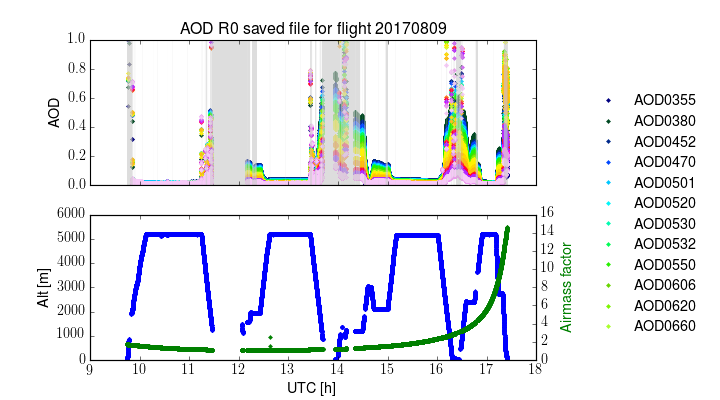

In [28]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} saved file for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ax[0].plot(outaod_RA[i][nm[0]],outaod_RA[i][aod],'.',label=aod)
    try:
        for x in outaod_RA[i][nm[0]][np.where(outaod_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,1)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

## Plot the high altitude subset of the data for calibration

<IPython.core.display.Javascript object>


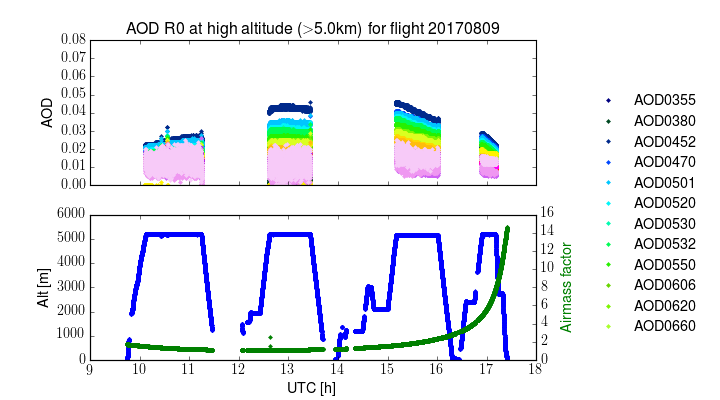

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [29]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$5.0km) for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>5000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,0.08)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_high_alt_AOD_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

In [30]:
wl[0:16]

('AOD0355',
 'AOD0380',
 'AOD0452',
 'AOD0470',
 'AOD0501',
 'AOD0520',
 'AOD0530',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0660',
 'AOD0675',
 'AOD0700',
 'AOD0781',
 'AOD0865')

<IPython.core.display.Javascript object>


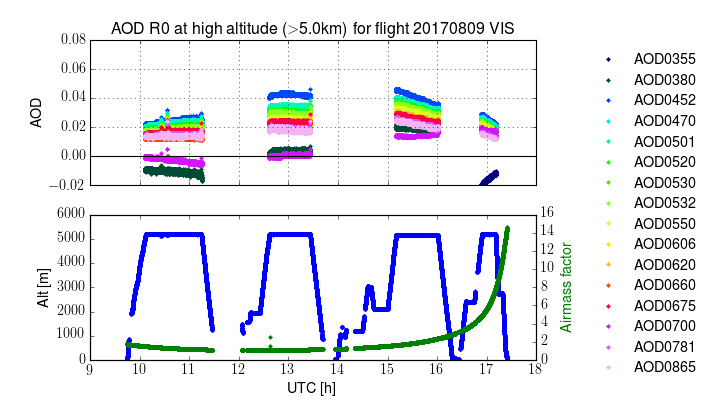

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [31]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$5.0km) for flight {} VIS'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for aod in wl[0:16]:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>5000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.08)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_high_alt_AOD_{vi}_{}_vis.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


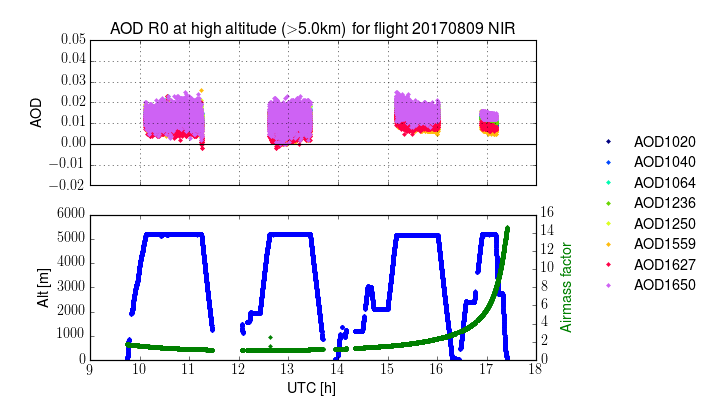

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [32]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$5.0km) for flight {} NIR'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[16:])+1)])
    for aod in wl[16:]:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>5000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.05)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_high_alt_AOD_{vi}_{}_nir.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

## Plot the AOD with the uncertainty

In [33]:
nm[30:46]

('UNCAOD0355',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0470',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0530',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0660',
 'UNCAOD0675',
 'UNCAOD0700',
 'UNCAOD0781',
 'UNCAOD0865')

<IPython.core.display.Javascript object>


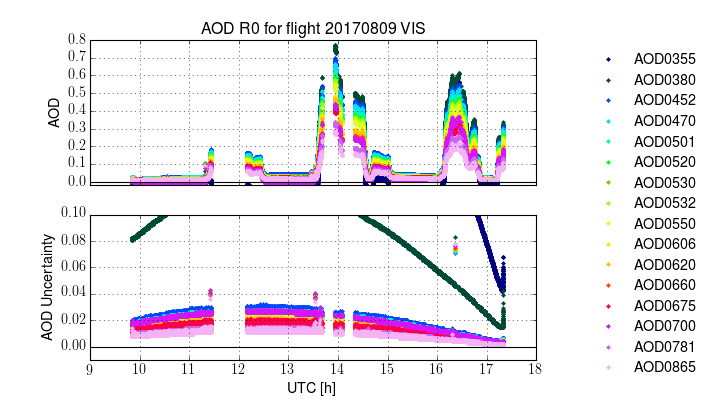

In [34]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} for flight {} VIS'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for aod in wl[0:16]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.8)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for unc in nm[30:46]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[1].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][unc][ii],'.',label=aod)
    ax[1].set_ylabel('AOD Uncertainty')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].grid()
    ax[1].axhline(0,color='k')
    
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_AOD_uncert_{vi}_{}_vis.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

In [35]:
nm[46:]

('UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650')

<IPython.core.display.Javascript object>


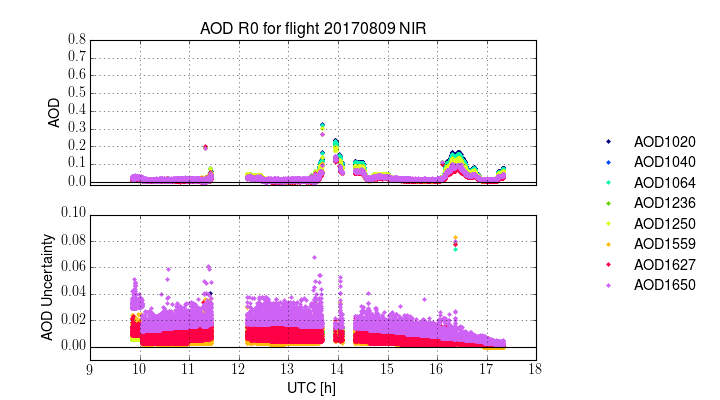

In [36]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} for flight {} NIR'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[16:])+1)])
    for aod in wl[16:]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.8)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(nm[46:])+1)])
    for unc in nm[46:]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[1].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][unc][ii],'.',label=aod)
    ax[1].set_ylabel('AOD Uncertainty')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].grid()
    ax[1].axhline(0,color='k')
    
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_AOD_uncert_{vi}_{}_nir.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

In [30]:
outaod_RA[i][unc][ii]

array([ 0.008,  0.012,  0.011, ...,  0.007,  0.015,  0.015])

In [31]:
nm[4]

'qual_flag'

<IPython.core.display.Javascript object>


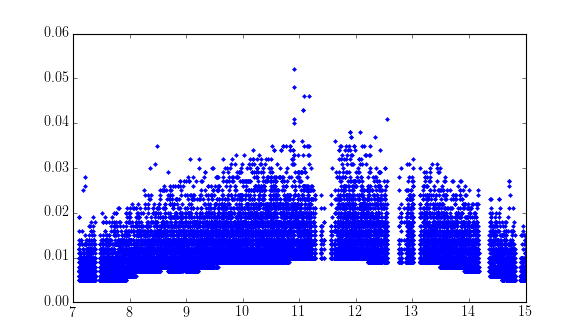

In [32]:
plt.figure()
ii = np.where((outaod_RA[0][nm[4]]==0))[0]
plt.plot(outaod_RA[0][nm[0]][ii],outaod_RA[i][unc][ii],'.')

## Plot spectral aod figures for high altitude

In [37]:
wv = [float(v[3:]) for v in wl]

In [38]:
wv

[355.0,
 380.0,
 452.0,
 470.0,
 501.0,
 520.0,
 530.0,
 532.0,
 550.0,
 606.0,
 620.0,
 660.0,
 675.0,
 700.0,
 781.0,
 865.0,
 1020.0,
 1040.0,
 1064.0,
 1236.0,
 1250.0,
 1559.0,
 1627.0,
 1650.0]

<IPython.core.display.Javascript object>


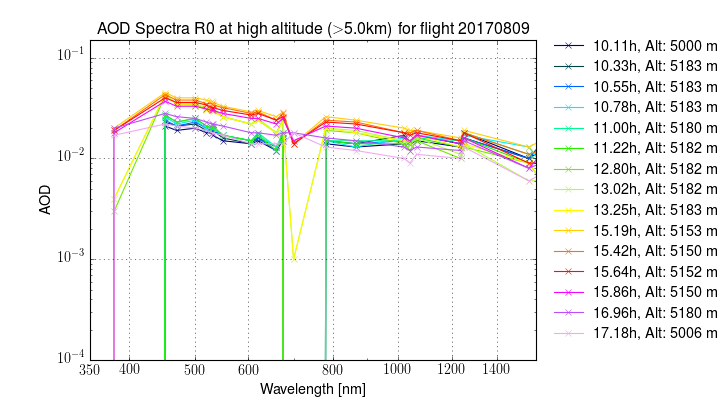

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\legend.py:319: UserWarning: Unrecognized location "top left". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(six.iterkeys(self.codes))))


In [39]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(1,sharex=True,figsize=(9,5))
    #ax = ax.ravel()
    ax.set_title('AOD Spectra {} at high altitude ($>$5.0km) for flight {}'.format(vv,d))
    ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>5000))[0]
    if not any(ii): continue
    js = np.linspace(0,len(ii)-1,15).astype(int)
    ax.set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, 16)])
    for j in js:
        sp = np.array([outaod_RA[i][n][ii[j]] for n in wl])
        fo = {'u':outaod_RA[i]['Start_UTC'][ii[j]],'a':outaod_RA[i]['GPS_Alt'][ii[j]]}
        if not np.isfinite(sp).any(): continue
        if any(sp>0.0):
            ax.plot(wv,sp,'x-',label='{u:5.2f}h, Alt: {a:5.0f} m'.format(**fo))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('AOD')
    ax.set_ylim(0.0001,0.15)
    ax.set_xlabel('Wavelength [nm]')
    ax.set_xlim(350.0,1600.0)
    plt.xticks([350,400,500,600,800,1000,1200,1400])
    
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(frameon=False,loc='top left',bbox_to_anchor=(1.01,1.04),numpoints=1)
    ax.grid()
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_high_alt_AOD_spectra_{vi}_{}.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

## Special case plotting

In [38]:
outaod_RA

[array([ (7.928333333333334, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (7.9286111111111115, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (7.928888888888889, nan, nan, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        ...,
        (14.485, -22.9795663, 14.6467012, 95.2, 0.0, 2.008, 0.148, 0.135, 0.118, 0.113, 0.111, 0.107, 0.096, 0.092, 0.086, 0.076, 0.071, 0.072, 0.064, 0.064, 0.057, 0.064, 0.058),
        (14.485277777777778, -22.9797486, 14.6461541, 94.3, 0.0, 2.008, 0.152, 0.137, 0.119, 0.114, 0.114, 0.109, 0.098, 0.094, 0.088, 0.079, 0.074, 0.076, 0.068, 0.068, 0.06, 0.067, 0.064),
        (14.485555555555555, -22.9798657, 14.6456057, 92.7, 0.0, 2.009, 0.154, 0.139, 0.121, 0.116, 0.116, 0.11, 0.099, 0.096, 0.09, 0.081, 0.077, 0.076, 0.067, 0.067, 0.061, 0.069, 0.067)], 
     

In [39]:
ax[0].set_ylim(0,15)

(0, 15)

In [40]:
fig.show()

In [41]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD0380',
 'AOD0452',
 'AOD0501',
 'AOD0520',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0675',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1559',
 'AOD1627')

<IPython.core.display.Javascript object>


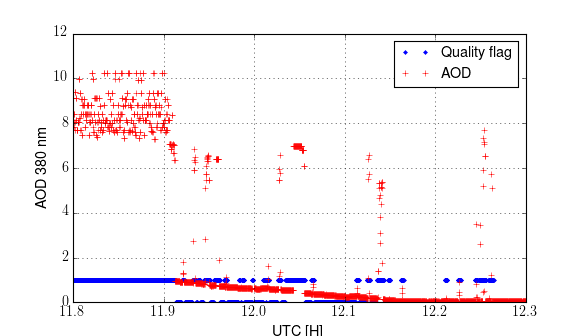

In [30]:
plt.figure()
plt.plot(outaod_RA[0]['Start_UTC'],outaod_RA[0]['qual_flag'],'b.',label='Quality flag')
plt.plot(outaod_RA[0]['Start_UTC'],outaod_RA[0]['AOD0380'],'r+',label='AOD')
plt.ylim(0,12)
plt.xlim(11.8,12.3)
plt.ylabel('AOD 380 nm')
plt.xlabel('UTC [H]')
plt.legend()
plt.grid()
plt.savefig(fp+'aod_ict/{vv}_20160920_zoom_QA_flag.png'.format(vv=vv),dpi=600,transparent=True)

### Special plotting of AOD per altitude and latitude

In [40]:
days

['20170809']

In [41]:
days[15]

IndexError: list index out of range

<IPython.core.display.Javascript object>


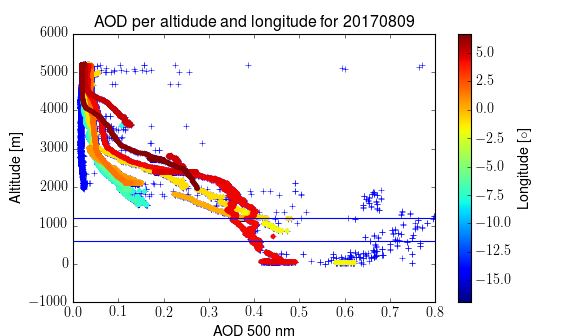

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [42]:
for i,d in enumerate(days):
    plt.figure()
    #d = days[15]
    plt.plot(outaod_RA[i]['AOD0501'],outaod_RA[i]['GPS_Alt'],'+',zorder=0)
    b = plt.scatter(outaod_RA[i]['AOD0501'][outaod_RA[i]['qual_flag']==0],outaod_RA[i]['GPS_Alt'][outaod_RA[i]['qual_flag']==0],
                marker='o',edgecolor='None',c=outaod_RA[i]['Longitude'][outaod_RA[i]['qual_flag']==0])
    plt.axhline(600)
    plt.axhline(1200)
    plt.xlim(0,0.8)
    plt.xlabel('AOD 500 nm')
    plt.ylabel('Altitude [m]')
    plt.title('AOD per altidude and longitude for {}'.format(d))
    cb = plt.colorbar(b)
    cb.set_label('Longitude [$\\circ$]')
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_{}_aod_alt_lon.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

## Make plots of angstrom exponent

In [43]:
def calc_angs(time,w,aod,flag):
    'Program to calculate the angstrom exponent by fitting linearly on the aod'
    ang = np.zeros_like(time)
    for i,t in enumerate(time):
        if not flag[i]==1:
            c,cm = linfit(np.log10(w),-np.log10(aod[:,i]))
            p = np.array([c[1],c[0]])
            ang[i] = c[0] 
        else:
            ang[i] = np.nan
        if (ang[i]<1.0) & (aod[2,i]>0.8):
            ang[i] = np.nan
    return ang

In [44]:
wls = [0.38,0.452,0.501,0.520,0.532,0.55,0.606,0.620,0.675,0.781,0.865,1.02,1.04,1.064,1.236,1.559]

In [45]:
wls = np.array(wv)/1000.0

In [46]:
aodrr, angarr = [],[]
for i,d in enumerate(days):
    aodarr = []
    for w in wl:
        aodarr.append(outaod_RA[i][w])
    aodarr = np.array(aodarr)

    ang = calc_angs(outaod_RA[i][nm[0]],wls,aodarr,outaod_RA[i][nm[4]])
    aodrr.append(aodarr)
    angarr.append(ang)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
linfit.py:224: RuntimeWarning: invalid value encountered in double_scalars
  yint = (sy - sx * slope)/s


<IPython.core.display.Javascript object>


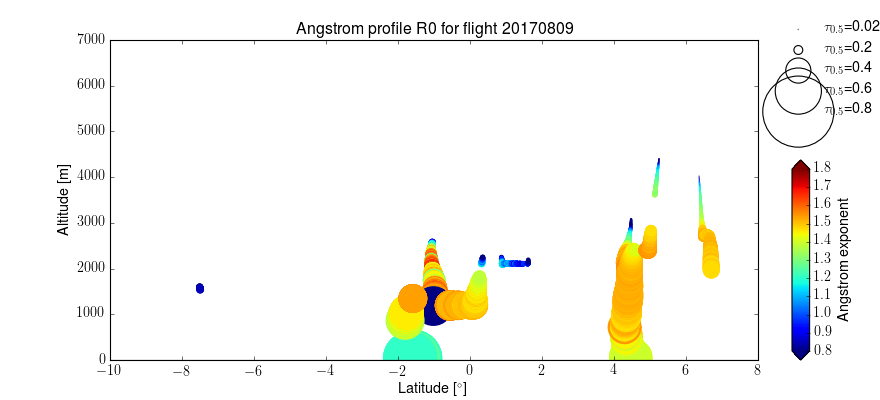

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


In [48]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(1,sharex=True,figsize=(11,5))
    ax.set_title('Angstrom profile {} for flight {}'.format(vv,d))
    v = ax.scatter(outaod_RA[i]['Longitude'],outaod_RA[i]['GPS_Alt'],(20*outaod_RA[i][wl[2]])**3.0,c=angarr[i],
                   marker='o',edgecolor='None',vmin=0.8,vmax=1.8)
    ax.set_ylabel('Altitude [m]')
    ax.set_ylim(0,7000)
    #ax.set_xlim(-23.5,-9.5)
    ax.axhline(0,color='k')
    ax.set_xlabel('Latitude [$^\\circ$]')
   
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
    
    cbaxes = fig.add_axes([0.9, 0.1, 0.02, 0.5]) 
    cbar =  plt.colorbar(v,extend='both',cax=cbaxes)
    cbar.set_label('Angstrom exponent')
    
    sizes = [0.02,0.2,0.4,0.6,0.8]
    labels = ['$\\tau_{{0.5}}$={0}'.format(s) for s in sizes]
    points = [ax.scatter([], [], s=(20*s)**3.0, c='None',marker='o',edgecolor='k') for s in sizes]
    plt.legend(points, labels, scatterpoints=1,frameon=False,loc='upper left',bbox_to_anchor=(-1.2,1.75))
    
    plt.savefig(fp+'aod_ict_2017/{vv}/{vv}_{}_lat_alt_angstrom.png'.format(d,vv=vv,vi=vi),dpi=600,transparent=True)

# Combine all the data in a single array

In [17]:
ar = {}
for n in nm:
    ar[n] = np.array([])

In [18]:
ar['days'] = np.array([])

In [19]:
for i,d in enumerate(days):
    ar['days'] = np.append(ar['days'],np.zeros_like(outaod_RA[i]['Start_UTC'])+i)
    for n in nm:
        ar[n] = np.append(ar[n],outaod_RA[i][n])

In [20]:
ar['GPS_Alt'].shape

(483692L,)

In [21]:
ar.keys()

['AOD1040',
 'AOD0532',
 'AOD1020',
 'AOD1627',
 'AOD0606',
 'AOD1559',
 'AOD1064',
 'AOD0620',
 'Latitude',
 'AOD0550',
 'AOD0452',
 'qual_flag',
 'AOD0520',
 'AOD0501',
 'Longitude',
 'AOD0675',
 'AOD1236',
 'AOD0380',
 'Start_UTC',
 'days',
 'AOD0781',
 'AOD0865',
 'amass_aer',
 'GPS_Alt']

## filter for low altitudes

In [22]:
ar['fl_alt'] = (ar['GPS_Alt']>600) & (ar['GPS_Alt']<1800)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [23]:
ar['fl_alt_6'] = ar['GPS_Alt']<=600

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


In [24]:
ar['fl_alt_18'] = ar['GPS_Alt']>=1800

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [25]:
ar['fl_QA'] = ar['qual_flag']==0

In [26]:
ar['fl'] = ar['fl_QA']&ar['fl_alt']

In [27]:
ar['fl1'] = ar['fl_QA']&ar['fl_alt_6']

In [28]:
ar['fl2'] = ar['fl_QA']&ar['fl_alt_18']

## save to file

In [52]:
import hdf5storage as hs

In [53]:
hs.savemat(fp+'/aod_ict/{vv}/all_aod_ict_{vv}.mat'.format(vv=vv),ar)

## Optionally load the file

In [1]:
import hdf5storage as hs

In [8]:
ar = hs.loadmat(fp+'/aod_ict/all_aod_ict.mat')

## Plot a histogram of all the AOD

In [29]:
from plotting_utils import prelim

<IPython.core.display.Javascript object>


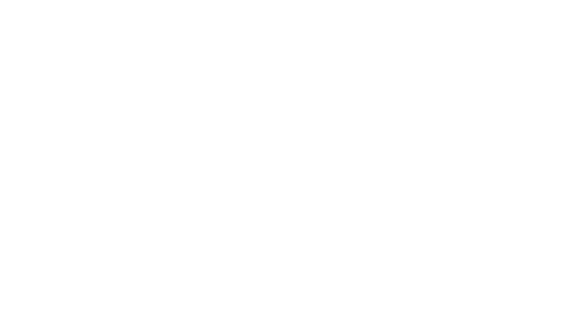

NameError: name 'ar' is not defined

In [53]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='600-1800 m')
plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.xlabel('AOD at 501 nm')
plt.ylabel('Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered')
#prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict/{vv}/{vv}_AOD_histogram.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


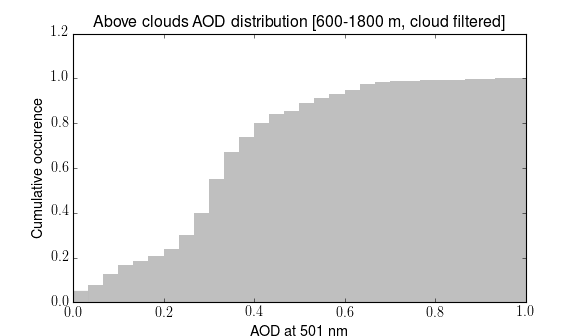

In [31]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='grey',cumulative=True)
plt.xlabel('AOD at 501 nm')
plt.ylabel('Cumulative occurence')
plt.title('Above clouds AOD distribution [600-1800 m, cloud filtered]')
plt.savefig(fp+'aod_ict/{vv}_AOD_histogram_cum.png'.format(vv=vv),dpi=600,transparent=True)

In [32]:
np.nanmean(ar['AOD0501'][ar['fl']])

0.32484108326429162

In [33]:
np.nanmedian(ar['AOD0501'][ar['fl']])

0.32000000000000001

In [34]:
np.nanstd(ar['AOD0501'][ar['fl']])

0.17513531197401336

## Make a histogram of the airmass

In [35]:
ar.keys()

['AOD1040',
 'AOD0532',
 'AOD1020',
 'AOD1627',
 'AOD0606',
 'AOD1559',
 'AOD1064',
 'fl_alt_6',
 'AOD0620',
 'Latitude',
 'AOD0550',
 'AOD0452',
 'fl1',
 'fl2',
 'qual_flag',
 'AOD0520',
 'AOD0501',
 'Longitude',
 'fl',
 'AOD0675',
 'fl_QA',
 'AOD1236',
 'AOD0380',
 'Start_UTC',
 'days',
 'AOD0781',
 'fl_alt_18',
 'fl_alt',
 'AOD0865',
 'amass_aer',
 'GPS_Alt']

<IPython.core.display.Javascript object>


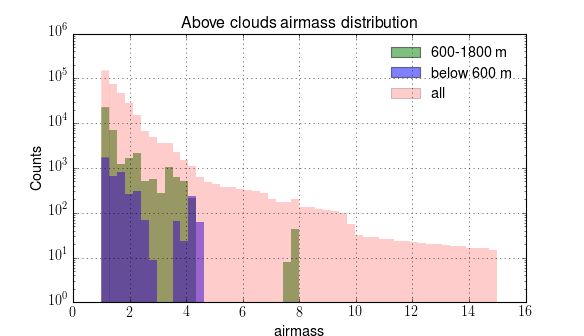

In [39]:
plt.figure()
plt.hist(ar['amass_aer'][ar['fl']],bins=50,range=(1.0,15.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='600-1800 m')
plt.hist(ar['amass_aer'][ar['fl1']],bins=50,range=(1.0,15.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
plt.hist(ar['amass_aer'],bins=50,range=(1.0,15.0),alpha=0.2,normed=False,edgecolor='None',color='r',label='all')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.xlabel('airmass')
plt.ylabel('Counts')
plt.grid()
plt.title('Above clouds airmass distribution')
plt.legend(frameon=False)
plt.gca().set_yscale('log')
plt.savefig(fp+'aod_ict/{vv}/{vv}_Airmass_histogram.png'.format(vv=vv),dpi=600,transparent=True)

# Make histogram for each flight 

In [49]:
i

0

In [50]:
np.nanmean(outaod_RA[i]['AOD0501'][fl])

NameError: name 'fl' is not defined

<IPython.core.display.Javascript object>


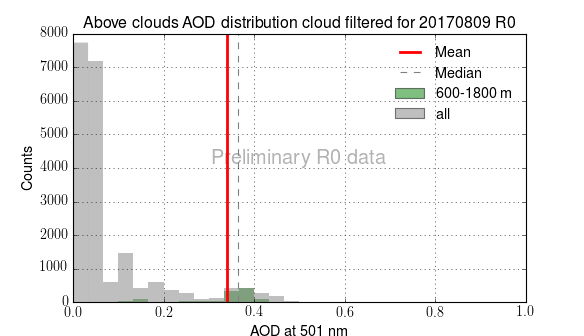

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [52]:
for i,d in enumerate(days):
    plt.figure()
    
    fl_alt = (outaod_RA[i]['GPS_Alt']>600) & (outaod_RA[i]['GPS_Alt']<1800)
    fl_QA = outaod_RA[i]['qual_flag']==0
    fl = fl_alt & fl_QA
    
    plt.hist(outaod_RA[i]['AOD0501'][fl],bins=30,range=(0,1.0),alpha=0.5,normed=False,
             edgecolor='None',color='g',label='600-1800 m')
    plt.hist(outaod_RA[i]['AOD0501'][fl_QA],bins=30,range=(0,1.0),alpha=0.5,normed=False,
             edgecolor='None',color='grey',label='all')
    plt.axvline(x=np.nanmean(outaod_RA[i]['AOD0501'][fl]),ls='-',color='r',lw=2.5,label='Mean')
    plt.axvline(x=np.nanmedian(outaod_RA[i]['AOD0501'][fl]),ls='--',color='grey',label='Median')
    plt.text(0.5, 0.5, 'Preliminary {} data'.format(vv),
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
    plt.xlabel('AOD at 501 nm')
    plt.ylabel('Counts')
    plt.grid()
    plt.title('Above clouds AOD distribution cloud filtered for {} {vv}'.format(d,vv=vv))
    plt.legend(frameon=False)
    plt.savefig(fp+'aod_ict_2017/{vv}/AOD_500_histogram_{}_{vv}.png'.format(d,vv=vv),dpi=600,transparent=True)

# Compare R0 and R1

In [63]:
ar1 = ar
ar0 = hs.loadmat(fp+'/aod_ict/all_aod_ict_R0.mat')

In [74]:
ar1['fl_alt_6k'] = ar1['GPS_Alt'] > 5700.0
ar1['fl_up'] = ar1['fl_QA']&ar1['fl_alt_6k']

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [75]:
ar0['fl_alt_6k'] = ar0['GPS_Alt'] > 5700.0
ar0['fl_up'] = ar0['fl_QA']&ar0['fl_alt_6k']

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [67]:
ar0.keys()

[u'AOD1040',
 u'AOD0532',
 u'AOD1020',
 u'AOD1627',
 u'AOD0606',
 u'AOD1559',
 u'AOD1064',
 'fl_alt_6k',
 u'fl_alt_6',
 u'AOD0620',
 u'Latitude',
 u'AOD0550',
 'fl_up',
 u'AOD0452',
 u'fl1',
 u'fl2',
 u'qual_flag',
 u'AOD0520',
 u'AOD0501',
 u'Longitude',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD0380',
 u'Start_UTC',
 u'days',
 u'AOD0781',
 u'fl_alt_18',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'GPS_Alt']

<IPython.core.display.Javascript object>


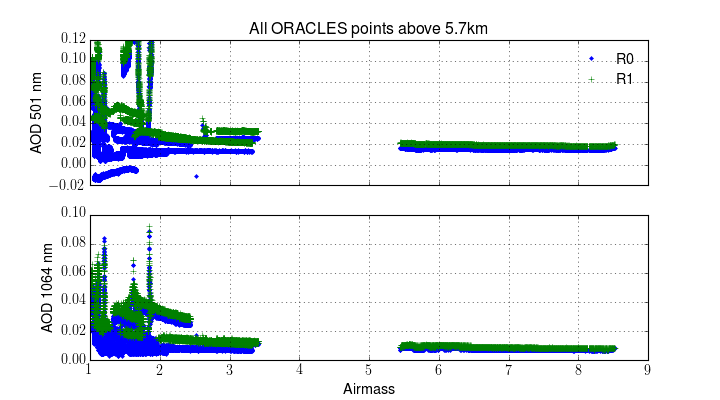

In [104]:
fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
ax = ax.ravel()
ax[0].plot(ar0['amass_aer'][ar0['fl_up']],ar0['AOD0501'][ar0['fl_up']],'.',label='R0')
ax[0].plot(ar1['amass_aer'][ar1['fl_up']],ar1['AOD0501'][ar1['fl_up']],'+',label='R1')
ax[0].set_ylabel('AOD 501 nm')
ax[0].set_ylim(-0.02,0.12)
ax[0].set_title('All ORACLES points above 5.7km')
ax[0].legend(frameon=False,numpoints=1)
ax[0].grid()

ax[1].plot(ar0['amass_aer'][ar0['fl_up']],ar0['AOD1064'][ar0['fl_up']],'.',label='R0')
ax[1].plot(ar1['amass_aer'][ar1['fl_up']],ar1['AOD1064'][ar1['fl_up']],'+',label='R1')
ax[1].set_xlabel('Airmass')
ax[1].set_ylabel('AOD 1064 nm')
ax[1].grid()

plt.savefig(fp+'aod_ict/{vv}/AOD_airmass_R0_vs_R1.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


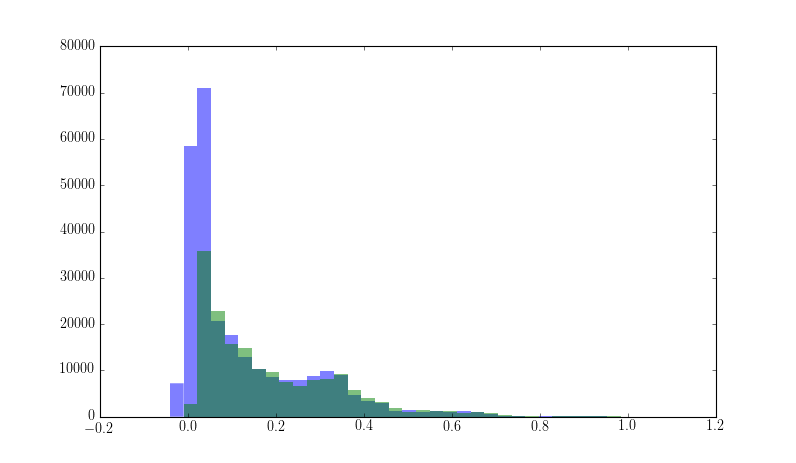

(array([  0.00000000e+00,   2.74800000e+03,   3.57460000e+04,
          2.27240000e+04,   1.57580000e+04,   1.47450000e+04,
          1.02030000e+04,   9.74100000e+03,   7.59900000e+03,
          6.52400000e+03,   8.01100000e+03,   8.22000000e+03,
          9.24000000e+03,   5.78400000e+03,   3.98900000e+03,
          3.18600000e+03,   1.97700000e+03,   1.04900000e+03,
          1.41800000e+03,   1.21900000e+03,   1.14100000e+03,
          8.12000000e+02,   1.11400000e+03,   7.41000000e+02,
          4.42000000e+02,   1.68000000e+02,   8.50000000e+01,
          3.30000000e+01,   7.00000000e+01,   7.10000000e+01,
          7.00000000e+01,   8.80000000e+01,   5.00000000e+01,
          1.10000000e+01,   3.00000000e+00,   7.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([-0.04 , -0.009,  0.022,  0.053,  0.084,  0.115,  0.146,  0.177,
         0.208,  0.239,  0.27 ,  0.301,  0.332,  0.363,  0.394,  0.425,
         0.456,  0.487

In [91]:
plt.figure()
plt.hist(ar0['AOD0501'][ar0['fl_QA']],bins=40,label='R0',range=(-0.04,1.2),alpha=0.5,edgecolor='None')
plt.hist(ar1['AOD0501'][ar1['fl_QA']],bins=40,label='R1',range=(-0.04,1.2),alpha=0.5,edgecolor='None')
plt.ylabel('AOd 501 nm')

# make plots of the gases

In [ ]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    for aod in wl:
        ax[0].plot(outgas_RA[i][nm[0]],outgas_RA[i][aod],'.',label=aod)
    try:
        for x in outgas_RA[i][nm[0]][np.where(outgas_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/RA_{}.png'.format(d),dpi=600,transparent=True)

In [32]:
outgas_RA[0].dtype.names

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'amass_O3',
 'amass_NO2',
 'CWV',
 'std_CWV',
 'QA_CWV',
 'VCD_O3',
 'resid_O3',
 'QA_O3',
 'VCD_NO2',
 'resid_NO2',
 'QA_NO2',
 'qual_flag')

<IPython.core.display.Javascript object>


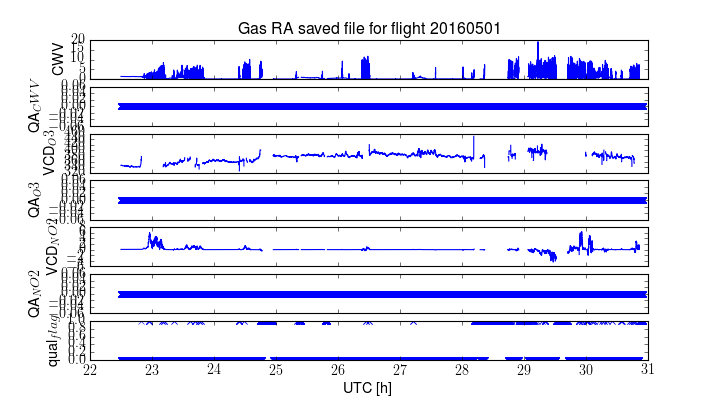

<IPython.core.display.Javascript object>


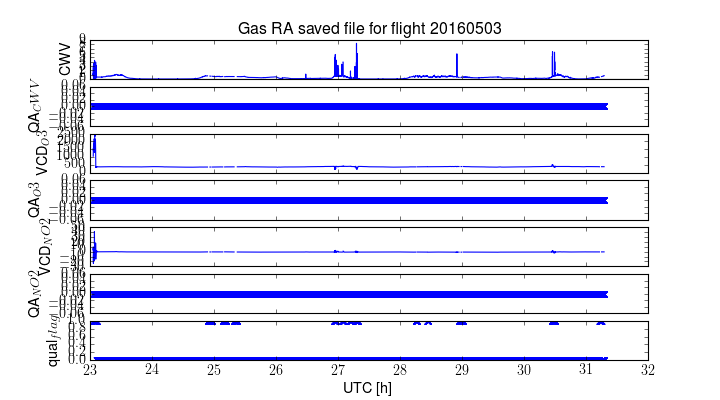

<IPython.core.display.Javascript object>


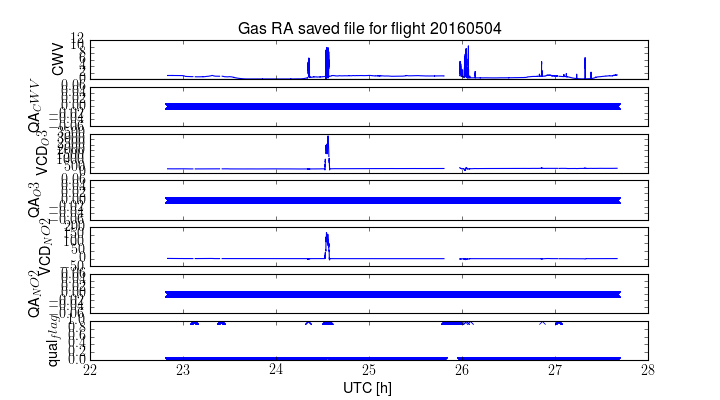

<IPython.core.display.Javascript object>


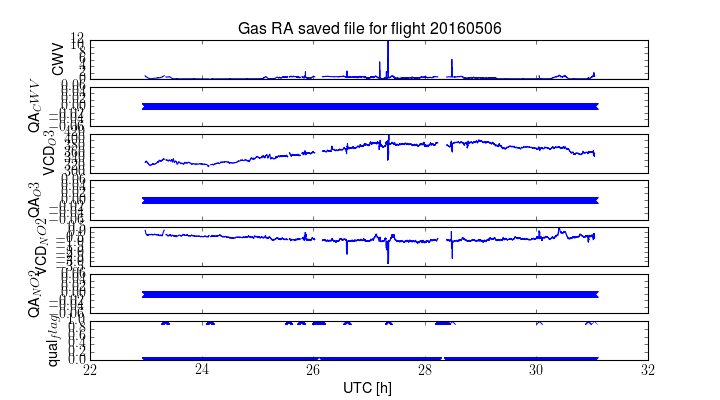

In [36]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(7,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    
    ax[0].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['CWV'])
    ax[0].set_ylabel('CWV')
    #ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    #box = ax[0].get_position()
    #ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_CWV'],'x')
    ax[1].set_ylabel('QA_CWV')
    
    ax[2].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_O3'])
    ax[2].set_ylabel('VCD_O3')
    
    ax[3].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_O3'],'x')
    ax[3].set_ylabel('QA_O3')
    
    ax[4].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_NO2'])
    ax[4].set_ylabel('VCD_NO2')
    
    ax[5].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_NO2'],'x')
    ax[5].set_ylabel('QA_NO2')
    
    ax[6].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['qual_flag'],'x')
    ax[6].set_ylabel('qual_flag')
    
    ax[6].set_xlabel('UTC [h]')